In [1]:
from qiskit_aer import AerSimulator
from pathlib import Path
import sys
import time

# add repo root (parent of notebooks/) to sys.path
sys.path.append(str(Path.cwd().parent))
from lib.graphlib import GraphLib

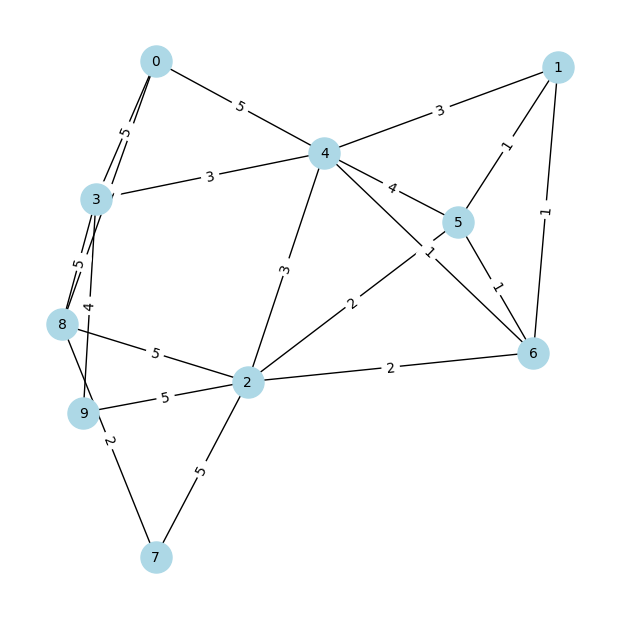

In [2]:
g = GraphLib()
g.generate_random_graph(num_vertices=10, edge_prob=0.5,
                        weight_range=(1, 5), seed=2)
g.visualize()

In [8]:
# Classical approximations. Use brute force only for small n.
t0 = time.time()
cut_brute, w_brute = g.max_cut_bruteforce()
t_brute = time.time() - t0

t0 = time.time()
cut_rand, w_rand = g.max_cut_random(trials=2000)
t_rand = time.time() - t0

t0 = time.time()
cut_local, w_local = g.max_cut_local_search(iterations=200)
t_local = time.time() - t0

print("Brute force approx", w_brute, "time", t_brute)
print("Random approx", w_rand, "time", t_rand)
print("Local search approx", w_local, "time", t_local)

Brute force approx 47 time 0.12071824073791504
Random approx 47 time 0.4038689136505127
Local search approx 34 time 0.0007524490356445312


In [9]:
# analytic p=1 optimize
g0 = time.time()
gamma_star, beta_star, val_star, refine_info = g.optimize_qaoa1_classical(
    grid_res=21, refine=True)
total_t = time.time() - g0
print("Analytic best:", (gamma_star, beta_star),
      "value:", val_star, "total_time:", total_t)
print("refine_info:", refine_info, "total_time:", total_t)

Analytic best: (0.48954294679895044, 0.32966415550989914) value: 36.116870499090616 total_time: 0.483229398727417
refine_info: {'success': True, 'message': 'Return from COBYLA because the trust region radius reaches its lower bound.'} total_time: 0.483229398727417


In [10]:
# simulate best params with AerSimulator
t0 = time.time()
res = g.qaoa1_expectation_simulated(
    gamma_star, beta_star, shots=1024, backend=AerSimulator())
total_t = time.time() - t0
print("simulation time:", total_t, "Simulation result:", res)

simulation time: 1.1201388835906982 Simulation result: {'expectation': 28.533203125, 'best_bitstring': '0000101110', 'best_cut': 46, 'counts': {'1011111100': 5, '1001100011': 1, '1110100011': 4, '1101010111': 1, '1010110111': 1, '0110101110': 2, '1000110000': 4, '0000111010': 3, '0111101000': 1, '0011101100': 3, '0011000001': 6, '0011100111': 1, '0011001110': 2, '1101111000': 1, '1111011110': 3, '1000111110': 1, '1110110111': 2, '0101010010': 2, '0000011110': 1, '0100100011': 3, '0001100000': 5, '0100101100': 1, '0110111100': 3, '1110000111': 3, '1000001111': 2, '1000010101': 2, '1111110101': 5, '1000110110': 1, '1111010110': 4, '0100001100': 1, '1110011111': 5, '0001110001': 3, '1110100100': 2, '1001100100': 5, '0100001000': 2, '0000100011': 1, '0001110000': 2, '0100010001': 1, '0001001110': 2, '0000001100': 1, '1101001101': 2, '1101010011': 1, '1011001101': 4, '1111000101': 7, '0110100110': 2, '1110110001': 1, '1000111100': 1, '1111011100': 4, '0010000001': 2, '0000000101': 2, '11010